In [1]:
import pandas as pd #dataframe
import os #direcciones
import numpy as np #formato de variables la importar
import glob# leer archivos con el mismo nombre de una ruta especifica
import matplotlib.pyplot as plt # Graficar
#import pandas.util.testing as tm
import seaborn as sns 
import datetime as dt
from matplotlib.pyplot import figure
pd.set_option('display.max_rows', None) 
from seaborn import distplot 
from matplotlib.pyplot import figure
#pd.set_option('display.max_colwidth', None)
#pd.set_option('display.width', None)
pd.set_option('display.max_columns',None)# Método uno para ver todas LAS COLUMNAS 
pd.options.display.max_columns = None # Método dos si no funciona el anterior Para ver .columns
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.4f}'.format
from IPython.core.display import display, HTML #Cambiar tamaño de la ventana
display(HTML("<style>.container { width:90% !important; }</style>"))

# Introduction
The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

Data Dictionary

* survival = Survival / 0 = No, 1 = Yes
* pclass = Ticket class / 1 = 1st, 2 = 2nd, 3 = 3rd
* sex = Sex
* Age = Age in years
* sibsp = of siblings / spouses aboard the Titanic
* parch = of parents / children aboard the Titanic
* ticket = Ticket number
* fare = Passenger fare
* cabin = Cabin number
* embarked = Port of Embarkation / C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes

pclass: A proxy for socio-economic status (SES) /1st = Upper /2nd = Middle /3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way... /Sibling = brother, sister, stepbrother, stepsister /Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way... /Parent = mother, father /Child = daughter, son, stepdaughter, stepson /Some children travelled only with a nanny, therefore parch=0 for them.


# Cargar el archivo

In [2]:
os.getcwd()

'C:\\Users\\nereida.combariza\\Documents\\00_Equipo\\08_clases'

In [3]:
import seaborn as sns
#titanic=sns.load_dataset('titanic')
titanic = pd.read_csv("titanic.csv")

# Numero de columnas

In [4]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [5]:
#colocar en minuscula
titanic.columns = map(str.lower, titanic.columns)

# Información básica del dataset

In [6]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [8]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.0000,891.0000,714.0000,891.0000,891.0000,891.0000
mean,0.3838,2.3086,29.6991,0.5230,0.3816,32.2042
std,0.4866,0.8361,14.5265,1.1027,0.8061,49.6934
min,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000
25%,0.0000,2.0000,20.1250,0.0000,0.0000,7.9104
50%,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542
75%,1.0000,3.0000,38.0000,1.0000,0.0000,31.0000
max,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292


In [9]:
#Check data type
titanic.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

<AxesSubplot:>

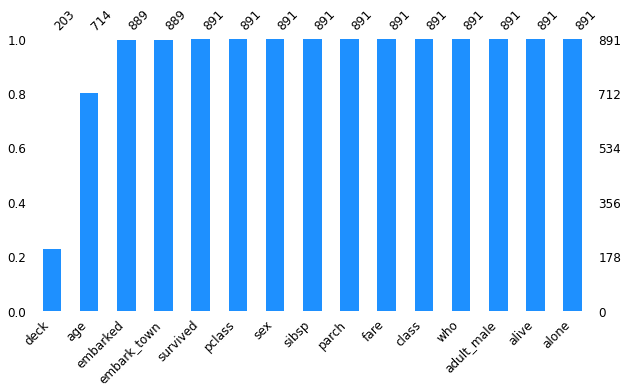

In [10]:
import missingno as msno
msno.bar(titanic,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

# Data Quality & Missing Value Assessment 

In [11]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

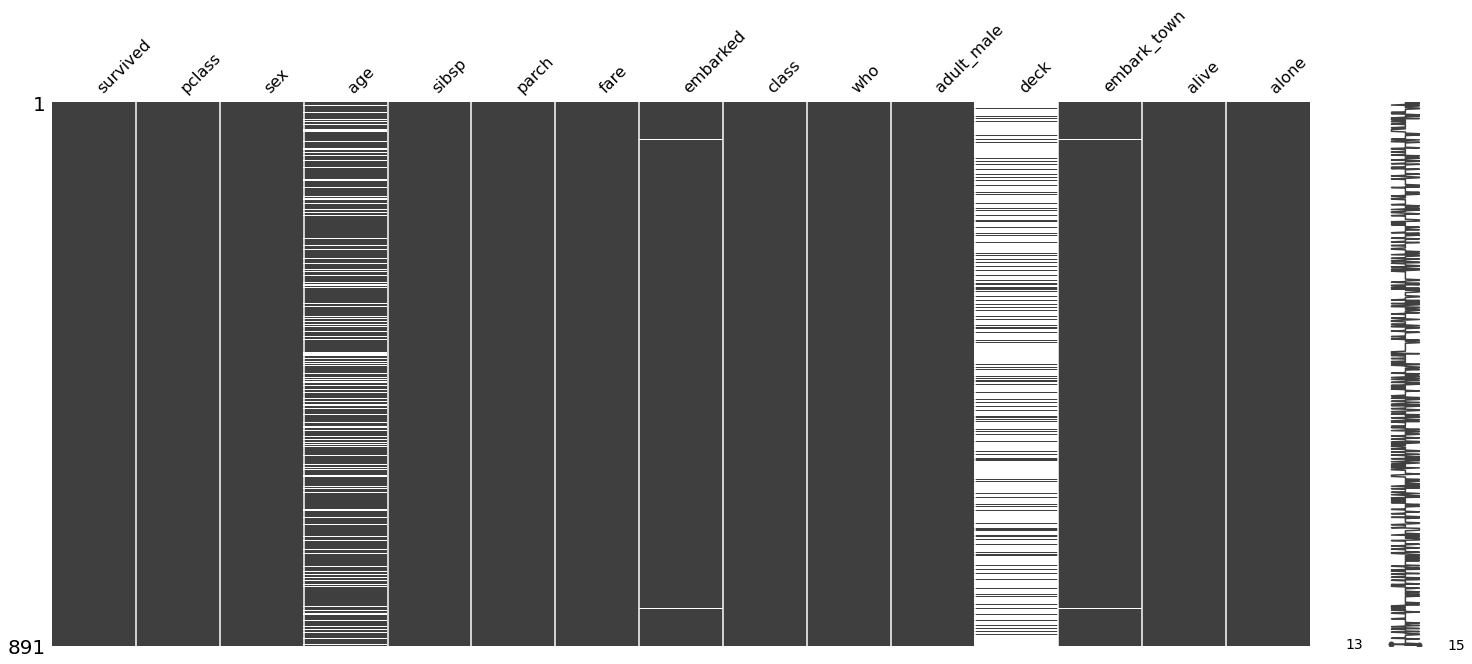

In [12]:
# we can look at our missing value with matris that is provide us to understand those missing values are rondom or not
msno.matrix(titanic)

# Age - Missing Values 

In [13]:
titanic[titanic.age.isna()].shape

(177, 15)

In [14]:
titanic[titanic.age.isna()].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,nan,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,nan,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,nan,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,nan,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,nan,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True


In [15]:
# proportion of "Age" missing
round(titanic[titanic.age.isna()].shape[0]/(titanic.shape[0]),4)*100

19.869999999999997

~20% of entries for passenger age are missing. Let's see what the 'Age' variable looks like in general.

## Basic Visualizations 

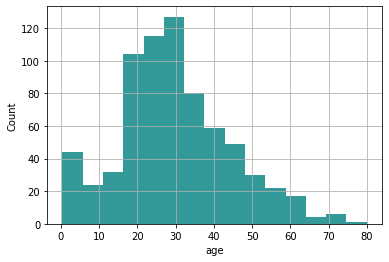

In [16]:
ax = titanic["age"].hist(bins=15, color='teal', alpha=0.8)
ax.set(xlabel='age', ylabel='Count')
plt.show()

Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values.

In [17]:
# median age is 28 (as compared to mean which is ~30)
titanic["age"].median(skipna=True)

28.0

## Cabin - Missing Values 

In [18]:
titanic[titanic.deck.isna()].shape

(688, 15)

In [19]:
# proportion of "cabin" missing
round(titanic[titanic.deck.isna()].shape[0]/titanic.shape[0],4)*100


77.22

## 2.3 Embarked - Missing Values 

In [20]:
# proportion of "cabin" missing
round(titanic[titanic.embarked.isna()].shape[0]/titanic.shape[0],4)*100

0.22

There are only 2 missing values for "Embarked", so we can just impute with the port where most people boarded.

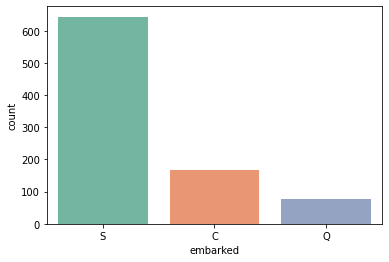

In [21]:
sns.countplot(x='embarked',data=titanic,palette='Set2')
plt.show()

2.4 Final Adjustments to Data (Train & Test)

In [22]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [23]:
train_data = titanic
train_data["age"].fillna(28, inplace=True)
train_data["embarked"].fillna("S", inplace=True)
#train_data.drop('cabin', axis=1, inplace=True)

## Basic Visualizations

<AxesSubplot:>

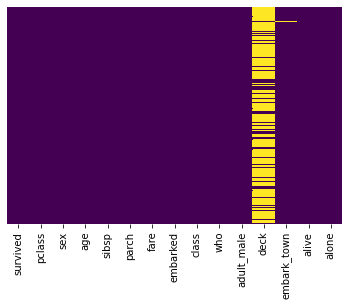

In [24]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Let us try to know if the dependent variable ‘Survived’ has any relation with the variable ‘Sex’.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


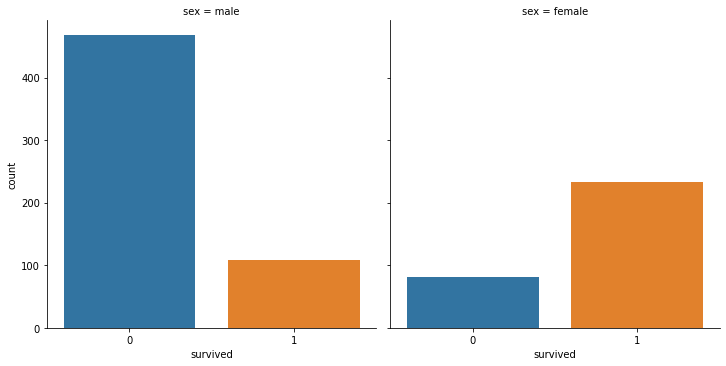

In [25]:
sns.factorplot(x='survived',col='sex',kind='count',data=titanic)

Inference: As we all know from the movie as well as the story of titanic females were given priority while saving passengers. The above graph also tells us the same story. More number of male passengers have died than female ones.

<AxesSubplot:xlabel='survived', ylabel='count'>

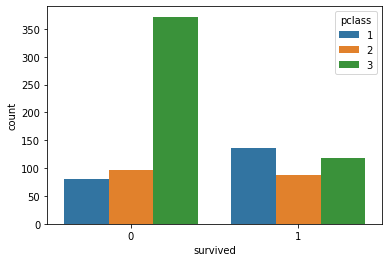

In [26]:
sns.countplot(x='survived',hue='pclass',data=titanic)

Inference: The graph tells us that Pclass 3 were more likely to be survived. It was meant for the richer people while Pclass 1 were the most likely victims which was relatively cheaper than class 3.

<AxesSubplot:xlabel='sibsp', ylabel='count'>

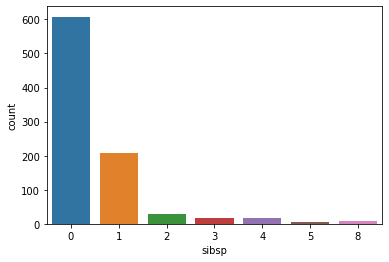

In [27]:
sns.countplot(x='sibsp',data=titanic)

Inference: Here ‘SibSp’ variable refers to the number of sibling or spouse the person was accompanied with. We can see most of the people came alone.

<AxesSubplot:xlabel='pclass', ylabel='age'>

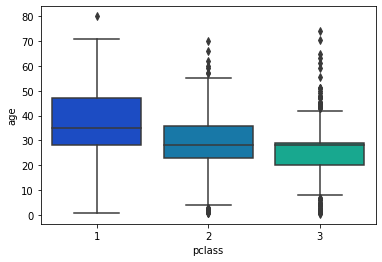

In [28]:
sns.boxplot(x='pclass',y='age',data=titanic,palette='winter')

# Exploratory Data Analysis

Question 1: What is the correlations between outcome and all other parameters?

In [29]:
pd.crosstab([titanic.embarked,titanic.pclass],[titanic.sex,titanic.survived],margins=True).style.background_gradient(cmap='summer_r')

Question 1 Comment:
The highest number of women and men who lost their lives are 3rd class passengers at Southampton Embarkation port.

The number of people who lost their lives was in the 3rd class most in total.

Question 2: What are the Passengers' survival percentages by class and gender?

In [30]:
pd.crosstab([titanic.sex,titanic.survived],titanic.pclass,margins=True).style.background_gradient(cmap='summer_r')

Question 3 : Number of survived/drowned passengers by age and gender?

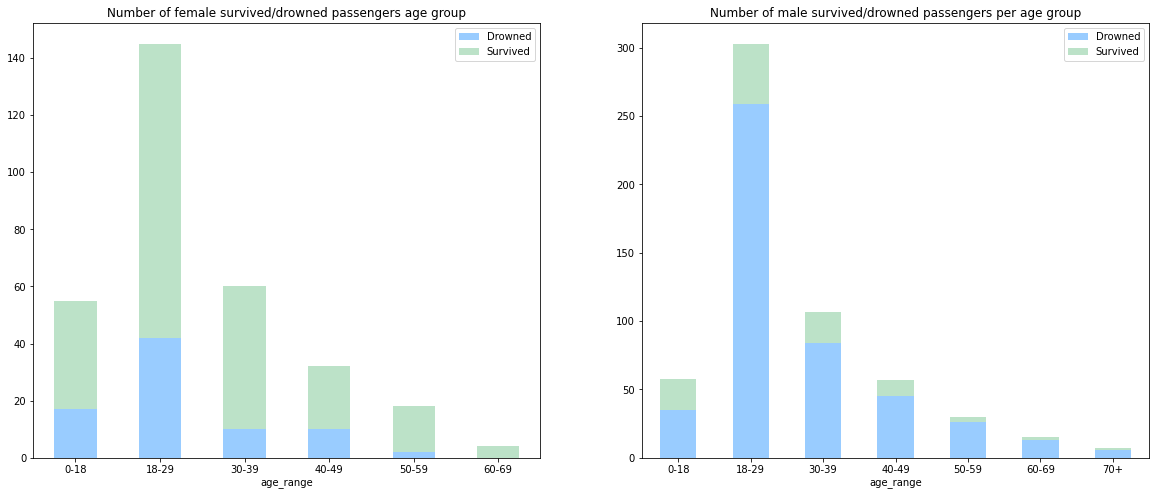

In [31]:
def age_buckets(x): 
    if x < 18: return '0-18' 
    elif x < 30: return '18-29'
    elif x < 40: return '30-39' 
    elif x < 50: return '40-49' 
    elif x < 60: return '50-59' 
    elif x < 70: return '60-69' 
    elif x >=70: return '70+' 
    else: return 'other'
    
    
titanic["age"] = titanic["age"].astype(int)

titanic["age_range"] = titanic["age"].apply(lambda x: age_buckets(x))

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,8))  

grouped_by_age_female = titanic[titanic["sex"] == 'female'].groupby(["age_range"])["survived"].value_counts().unstack()
grouped_by_age_female.plot.bar(stacked=True, color=['#99CCFF', '#BCE2C8'], rot=0,ax=ax1, title="Number of female survived/drowned passengers age group")
ax1.legend(('Drowned', 'Survived'))

grouped_by_age_men = titanic[titanic["sex"] == 'male'].groupby(["age_range"])["survived"].value_counts().unstack()
grouped_by_age_men.plot.bar(stacked=True, color=['#99CCFF', '#BCE2C8'], rot=0,ax=ax2, title="Number of male survived/drowned passengers per age group")
ax2.legend(('Drowned', 'Survived'))


Question 3 Comment:

We can conclude that the number of female survivors per age group is higher than the number of females per age group that drowned.

When looking at the number of male survivors, we can observe that male passenger were more likely to drown in all age groups.

Question 4 : What are the Passengers' survival/drowned distribution for passengers with parents / children on board?

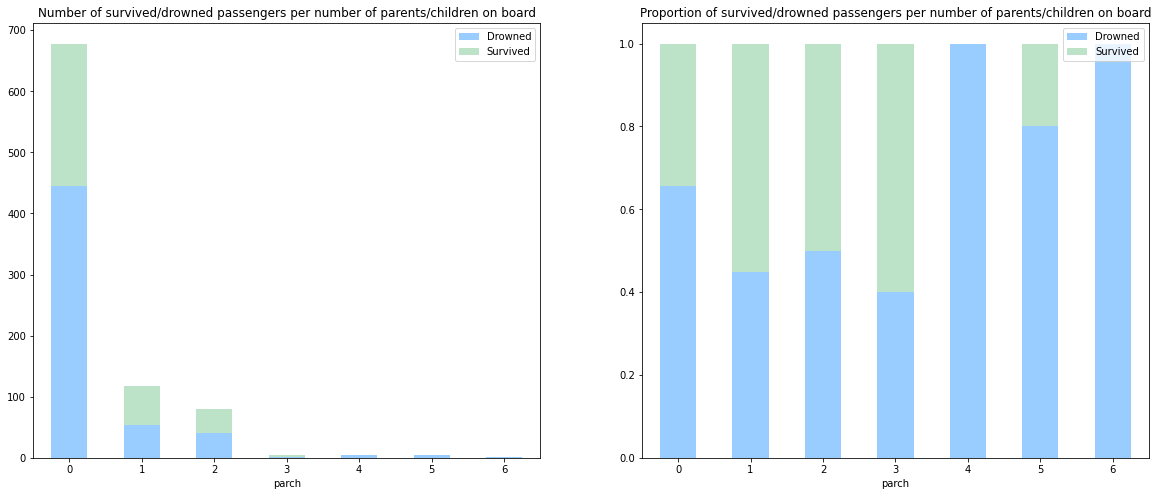

In [32]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,8)) 

grouped_by_family = titanic.groupby(["parch"])["survived"].value_counts()
grouped_by_family.unstack().plot.bar(stacked=True, color=['#99CCFF', '#BCE2C8'], rot=0,ax=ax1, title="Number of survived/drowned passengers per number of parents/children on board")
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
ax1.legend(('Drowned', 'Survived'))

grouped_by_family_norm = titanic.groupby(["parch"])["survived"].value_counts(normalize=True)
grouped_by_family_norm.unstack().plot.bar(stacked=True, color=['#99CCFF', '#BCE2C8'], rot=0,ax=ax2, title="Proportion of survived/drowned passengers per number of parents/children on board")
ax2.legend(('Drowned', 'Survived'))

Question 4 Comment:

We can see that the majority of the passengers traveled without children/parents. If traveling with children/parents, the chances of surviving have not been significantly higher.

Question 5: What is the proportion of survivors and non-survivors among siblings and spouse(except mistresses and fiancés )?


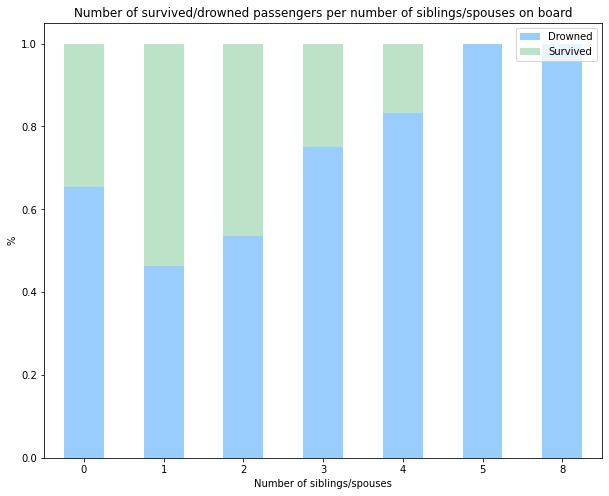

In [33]:
grouped_by_sibsp = titanic.groupby('sibsp')['survived'].value_counts(normalize=True).unstack()
grouped_by_sibsp.plot(kind='bar', color=["#99CCFF", "#BCE2C8"], stacked=True, rot=0, figsize=(10,8), title="Number of survived/drowned passengers per number of siblings/spouses on board")
plt.legend(( 'Drowned', 'Survived'))

plt.xlabel('Number of siblings/spouses')
plt.ylabel('%')
plt.show()

Question 5 Comment:
We can observe that the percentage of survivors that traveled with siblings/spouses of size 1 and 2 is bigger compared to single travelers. On the contrary when traveling with starting 3 siblings/spouses the percentage of surviving decreases.

# Visualization

In [34]:
#Sex and Embarked columns to check if there's any correlation between them and the Survived data

titanic['sex_data'] = titanic['sex'].map({'male': 1,'female': 0})
titanic['embarked_data'] = titanic['embarked'].map({'S': 0,'C': 1, 'Q': 2})
titanic.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_data,embarked_data
survived,1.0000,-0.3385,-0.0649,-0.0353,0.0816,0.2573,-0.5571,-0.2034,-0.5434,0.1068
pclass,-0.3385,1.0000,-0.3400,0.0831,0.0184,-0.5495,0.0940,0.1352,0.1319,0.0457
age,-0.0649,-0.3400,1.0000,-0.2331,-0.1727,0.0968,0.2477,0.1718,0.0807,-0.0095
sibsp,-0.0353,0.0831,-0.2331,1.0000,0.4148,0.1597,-0.2536,-0.5845,-0.1146,-0.0600
parch,0.0816,0.0184,-0.1727,0.4148,1.0000,0.2162,-0.3499,-0.5834,-0.2455,-0.0787
fare,0.2573,-0.5495,0.0968,0.1597,0.2162,1.0000,-0.1820,-0.2718,-0.1823,0.0621
adult_male,-0.5571,0.0940,0.2477,-0.2536,-0.3499,-0.1820,1.0000,0.4047,0.9086,-0.1085
alone,-0.2034,0.1352,0.1718,-0.5845,-0.5834,-0.2718,0.4047,1.0000,0.3036,0.0178
sex_data,-0.5434,0.1319,0.0807,-0.1146,-0.2455,-0.1823,0.9086,0.3036,1.0000,-0.1166
embarked_data,0.1068,0.0457,-0.0095,-0.0600,-0.0787,0.0621,-0.1085,0.0178,-0.1166,1.0000


Text(0.5, 1.0, 'Correlation')

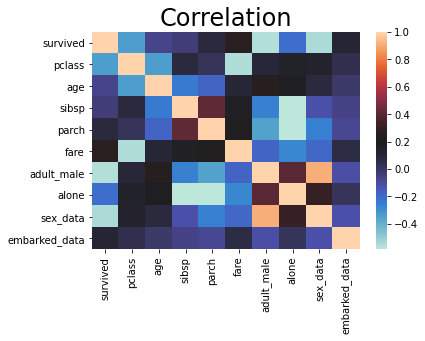

In [35]:
sns.heatmap(titanic.corr(), cmap='icefire')
plt.title('Correlation', fontsize=24)
#In our analysis we see a low correlation between embarked and sex.

In [36]:
#Visualization of 'Survived' (Target column)
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

Text(0, 0.5, 'Passenger Count')

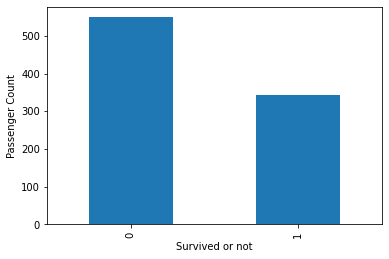

In [37]:
train = titanic.survived.value_counts().plot(kind='bar')
train.set_xlabel('Survived or not')
train.set_ylabel('Passenger Count')

Text(0, 0.5, 'Survival Probability')

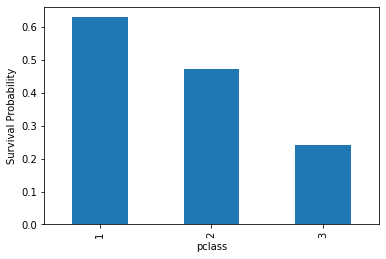

In [38]:
train = titanic[['pclass', 'survived']].groupby('pclass').mean().survived.plot(kind='bar')
train.set_xlabel('pclass')
train.set_ylabel('Survival Probability')

<AxesSubplot:xlabel='sex'>

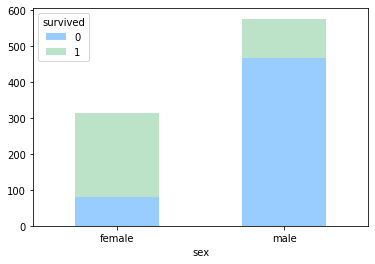

In [39]:
#Survival per Age/Sex
grouped_by_sex = titanic.groupby(["sex"])["survived"].value_counts()
grouped_by_sex.unstack().plot.bar(stacked=True, color=['#99CCFF', '#BCE2C8'], rot=0)